In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("bigmart_sales.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0])

In [8]:
df['Item_Identifier'] = df['Item_Identifier'].map({"F": 0, "N": 1, "D":2})

In [9]:
df['Item_Identifier'].value_counts()

Item_Identifier
0    6125
1    1599
2     799
Name: count, dtype: int64

In [10]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({"Low Fat":0, "LF": 0, "low fat": 0, "reg": 1, "Regular":1})

In [12]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

In [13]:
df['Outlet_Identifier'] = df["Outlet_Identifier"].apply(lambda x: int(x[3:]))

In [14]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
27    935
13    932
49    930
46    930
35    930
45    929
18    928
17    926
10    555
19    528
Name: count, dtype: int64

In [15]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [16]:
df.groupby(by ="Outlet_Identifier")["Item_Outlet_Sales"].mean()

Outlet_Identifier
10     339.351662
13    2298.995256
17    2340.675263
18    1995.498739
19     340.329723
27    3694.038558
35    2438.841866
45    2192.384798
46    2277.844267
49    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [17]:
df.groupby("Outlet_Identifier")["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Size
13                 High           932
18                 Medium         928
19                 Small          528
27                 Medium         935
35                 Small          930
46                 Small          930
49                 Medium         930
Name: count, dtype: int64

In [18]:
# missing outlet_type --> 10, 17, 45

In [19]:
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].map({"Tier 1":0, "Tier 2":1, "Tier 3": 2})

In [20]:
df["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
2    3350
1    2785
0    2388
Name: count, dtype: int64

In [21]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [22]:
df.groupby("Outlet_Type")["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

In [23]:
df.groupby("Outlet_Type")["Outlet_Location_Type"].value_counts()

Outlet_Type        Outlet_Location_Type
Grocery Store      2                        555
                   0                        528
Supermarket Type1  1                       2785
                   0                       1860
                   2                        932
Supermarket Type2  2                        928
Supermarket Type3  2                        935
Name: count, dtype: int64

In [24]:
df[df["Outlet_Identifier"]==10]["Outlet_Type"].value_counts()

Outlet_Type
Grocery Store    555
Name: count, dtype: int64

In [25]:
df[df["Outlet_Identifier"]==17]["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    926
Name: count, dtype: int64

In [26]:
df[df["Outlet_Identifier"]==45]["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    929
Name: count, dtype: int64

In [27]:
outlet = {"Grocery Store":"Small",
          "Supermarket Type1":"Small",
          "Supermarket Type2":"Medium",
          "Supermarket Type3":"Medium"}

In [28]:
def outlet_size(x):
    if pd.isna(x[0]):
        return outlet[x[1]]
    else:
        return x[0]

In [29]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [30]:
# df["Outlet_Size"] = df[["Outlet_Size", "Outlet_Type"]].apply(outlet_size, axis =1)

In [31]:
df["Outlet_Size"].fillna("Medium", inplace=True)

In [32]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [33]:
df["Outlet_Size"] = df["Outlet_Size"].map({"Small": 0, "Medium": 1, "High": 2})

In [34]:
df["Outlet_Size"].value_counts()

Outlet_Size
1    5203
0    2388
2     932
Name: count, dtype: int64

In [35]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [36]:
df = df.join(pd.get_dummies(df["Outlet_Type"], drop_first=True, dtype=int))

In [37]:
df.drop("Outlet_Type", inplace = True, axis=1)

In [38]:
items_mean = dict(df.groupby("Item_Type")["Item_Weight"].mean())

In [39]:
items_mean

{'Baking Goods': 12.277108208955223,
 'Breads': 11.346936274509805,
 'Breakfast': 12.768202247191013,
 'Canned': 12.305705009276437,
 'Dairy': 13.42606890459364,
 'Frozen Foods': 12.867061281337046,
 'Fruits and Vegetables': 13.224769381746812,
 'Hard Drinks': 11.400327868852461,
 'Health and Hygiene': 13.14231395348837,
 'Household': 13.384736495388669,
 'Meat': 12.81734421364985,
 'Others': 13.853284671532847,
 'Seafood': 12.552843137254904,
 'Snack Foods': 12.987879554655871,
 'Soft Drinks': 11.847459893048129,
 'Starchy Foods': 13.69073076923077}

In [40]:
def weight(x):
    if np.isnan(x[0]):
        return round(items_mean[x[1]], 3)
    else:
        return x[0]

In [41]:
df["Item_Weight"]=df[["Item_Weight", "Item_Type"]].apply(weight, axis=1)

C:\Users\ritik\AppData\Local\Temp\ipykernel_4368\1673036325.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(x[0]):
C:\Users\ritik\AppData\Local\Temp\ipykernel_4368\1673036325.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[0]
C:\Users\ritik\AppData\Local\Temp\ipykernel_4368\1673036325.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return round(items_mean[x[1]], 3)


In [42]:
# df["Item_Weight"].mean()

In [43]:
# df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace= True)

In [44]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Item_Outlet_Sales            0
Supermarket Type1            0
Supermarket Type2            0
Supermarket Type3            0
dtype: int64

In [45]:
df = df.join(pd.get_dummies(df["Item_Type"],drop_first=True, dtype=int))

In [46]:
df.drop("Item_Type", axis=1, inplace=True)

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,9.30,0,0.016047,249.8092,49,1999,1,0,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,2,5.92,1,0.019278,48.2692,18,2009,1,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,0,17.50,0,0.016760,141.6180,49,1999,1,0,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,0,19.20,1,0.000000,182.0950,10,1998,1,2,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,1,8.93,0,0.000000,53.8614,13,1987,2,2,994.7052,...,0,0,0,1,0,0,0,0,0,0


<Axes: >

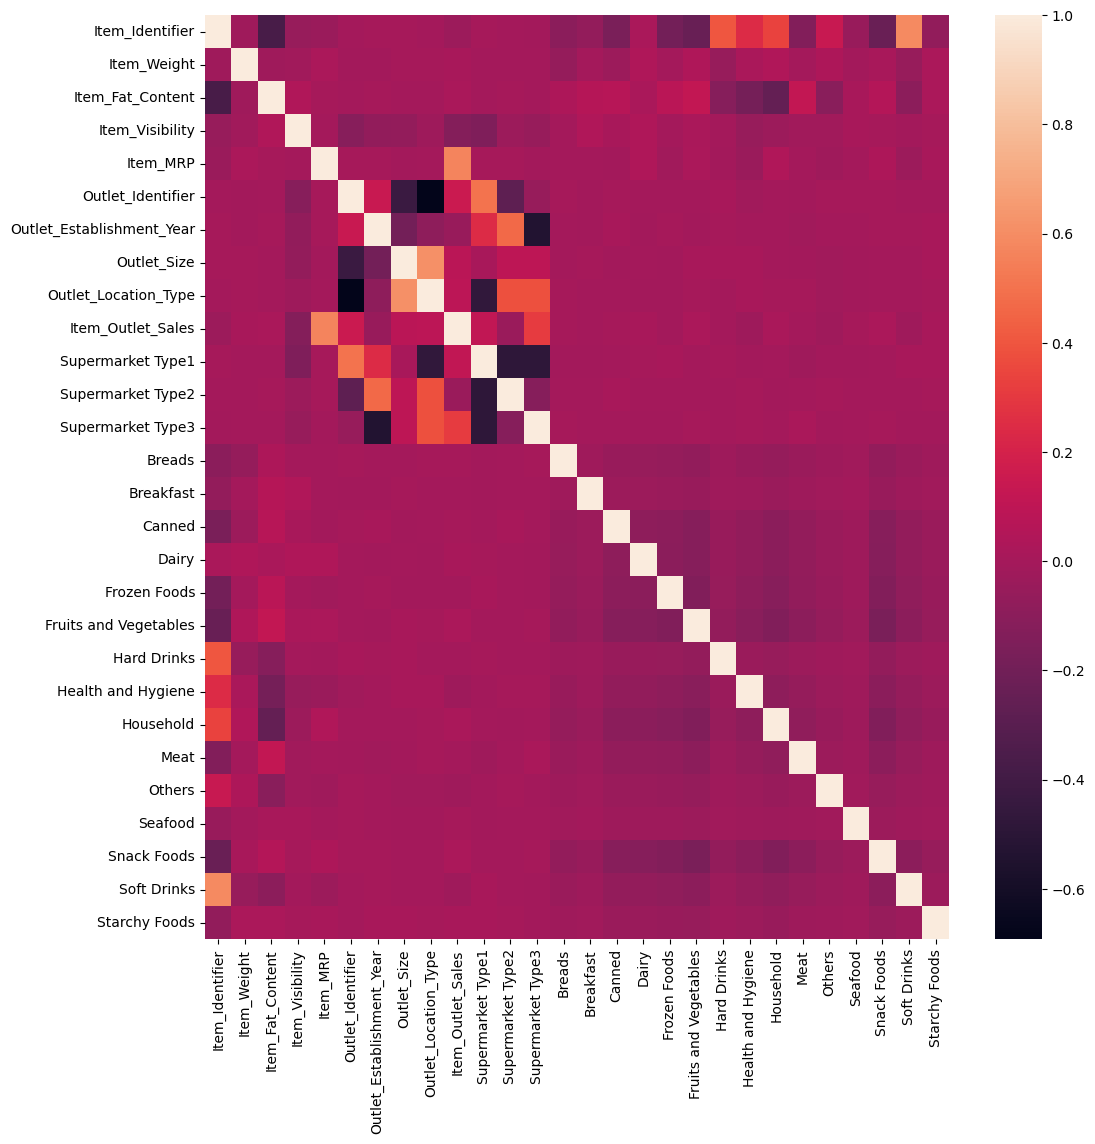

In [48]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
df.shape

(8523, 28)

In [51]:
X = df.drop("Item_Outlet_Sales", axis = 1)
y = df["Item_Outlet_Sales"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
xgboost = XGBRegressor()

In [55]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
xg_predictions = xgboost.predict(X_test)

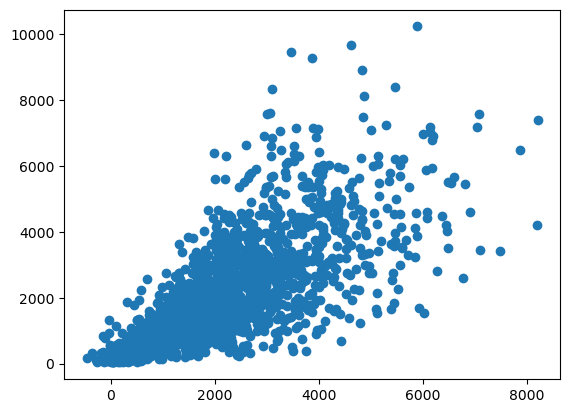

In [57]:
plt.scatter(x=xg_predictions, y= y_test)

In [58]:
print(r2_score(y_test, xg_predictions))

0.5228016699494848


In [59]:
print(np.sqrt(mean_squared_error(y_test, xg_predictions)))

1138.8638096439747


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
linear = LinearRegression()

In [62]:
linear.fit(X_train, y_train)

LinearRegression()

In [63]:
linear_predictions = linear.predict(X_test)

In [64]:
print(r2_score(y_test, linear_predictions))

0.5788617554025348


In [65]:
print(np.sqrt(mean_squared_error(y_test, linear_predictions)))

1069.8790318178135


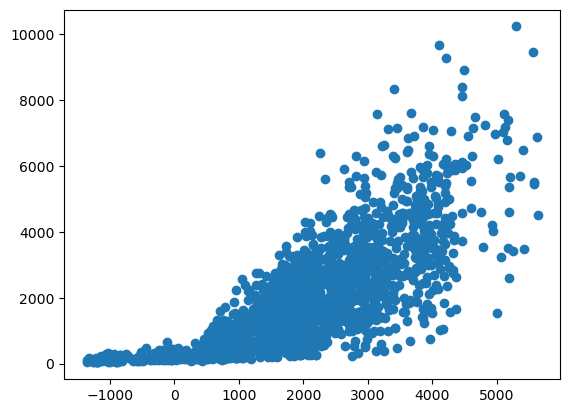

In [66]:
plt.scatter(x=linear_predictions, y= y_test)